In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tqdm.auto import tqdm

from simulator import *

In [2]:
# import dill
# import os
# import re

# def save_caches(caches, pathname, split=True):
#     if split:
#         for i, cache in enumerate(caches):
#             with open(f"{pathname}-{i}", "wb") as f:
#                 dill.dump(cache, f)
#     else:
#           with open(f"{pathname}-0", "wb") as f:
#                 dill.dump(caches, f)
        
# def load_caches(pathname):
#     tmp = []
#     dirname = dirname = os.path.dirname(os.path.abspath(pathname))
#     filename = pathname.split("/")[-1]
#     for file in sorted(os.listdir(dirname)):
#         if re.findall(f"{filename}-", file):
#             with open(f"{dirname}/{file}", "rb") as f:
#                 tmp.append(dill.load(f))
#     return tmp

In [3]:
relative_cache_size = 0.3

cache_file_irm = f"./figures/pickle/irm_caches_{relative_cache_size}.pickle"
cache_file_rrm = f"./figures/pickle/rrm_caches_{relative_cache_size}.pickle"
cache_file_yt = f"./figures/pickle/yt_caches_{relative_cache_size}.pickle"
cache_file_movielens = f"./figures/pickle/movielens_caches_{relative_cache_size}.pickle"
cache_file_rrm_multiple = f"./figures/pickle/rrm_multiple_caches_{relative_cache_size}.pickle"


# IRM

In [4]:
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = \
load_caches(cache_file_irm)
cache_ranking_experts_mix.name = "DEC (Mix)"
cache_ranking_experts.name = "DEC"
cache_BH.name = "BH"
cache_DiscreteOGA.name = "D-OGA"


/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


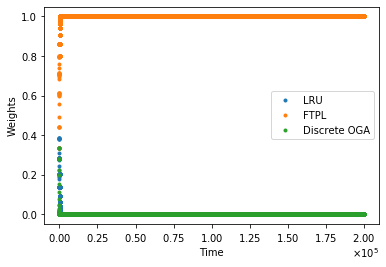

In [5]:
cache_ranking_experts.plot_expert_weights()

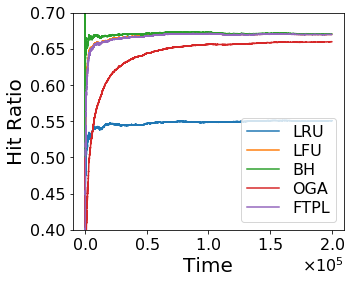

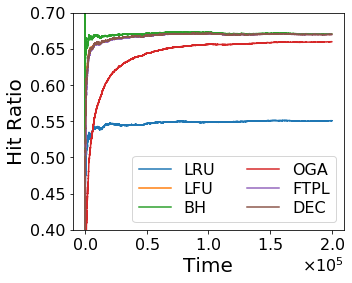

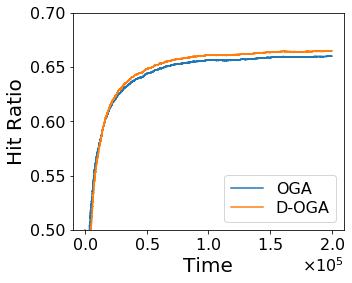

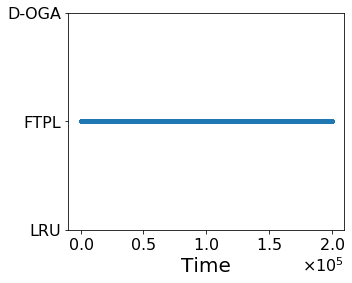

In [6]:
set_fig_halfwidth()
dataset = "irm"
save = False
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
#           cache_ranking_experts,\
#           cache_ranking_experts_mix,\
         )
plt.ylim([0.4, 0.7])
if save:
    plt.savefig(f"./figures/analysis_{dataset}.pdf")
plt.show()

plt.clf()
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
          cache_ranking_experts,\
#           cache_ranking_experts_mix,\
          legend_columns=2,\
#           legend_loc="lower right",\
         )
plt.ylim([0.4, 0.7])
if save:
    plt.savefig(f"./figures/ranking_{dataset}.pdf")
plt.show()
    
    
plt.clf()
plot_comp(\
          cache_OGA,\
          cache_DiscreteOGA,\
         )
plt.ylim([0.5, 0.7])
if save:
    plt.savefig(f"./figures/D-OGA_{dataset}.pdf")
plt.show()

plt.clf()
plot_expert_choices(cache_ranking_experts, ["LRU", "FTPL", "D-OGA"])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_ep_choices.png", dpi=600)
plt.show()

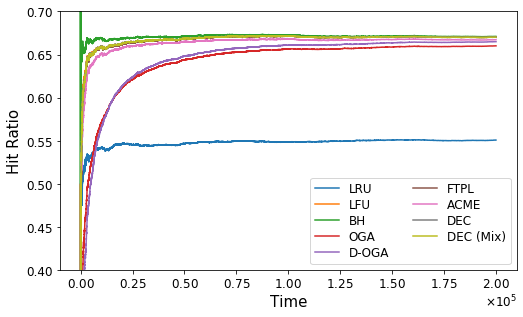

In [7]:
set_fig_fullwidth(scale=1.5)
dataset = "irm"
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,\
          legend_columns=2)
plt.ylim([0.4, 0.7])
if save:
    plt.gcf().savefig(f"./figures/ranking_{dataset}_all.pdf")
plt.show()

# Random Replacement Model

In [15]:
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = \
load_caches(cache_file_rrm)
cache_ranking_experts_mix.name = "DEC (Mix)"
cache_ranking_experts.name = "DEC"
cache_BH.name = "BH"
cache_DiscreteOGA.name = "D-OGA"

/home/koen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  after removing the cwd from sys.path.
/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


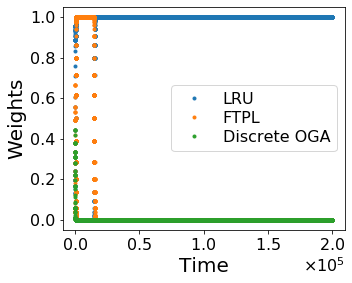

/home/koen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


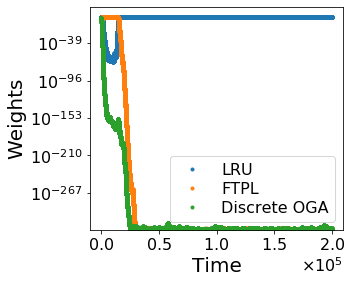

In [16]:
%matplotlib inline
set_fig_halfwidth()
cache_ranking_experts.plot_expert_weights()
plt.savefig(f"./figures/ranking_rrm_ep_weights.png", dpi=600)
plt.show()

cache_ranking_experts.plot_expert_weights()
plt.yscale("log")
plt.savefig(f"./figures/ranking_rrm_ep_weights_ylog.png", dpi=600)
plt.show()
# plt.xlim([0, 25000])

/home/koen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  after removing the cwd from sys.path.
/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


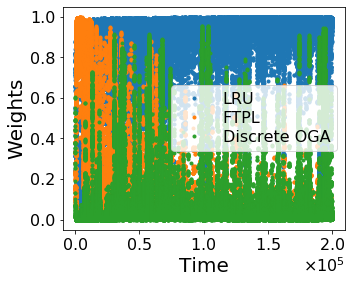

/home/koen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


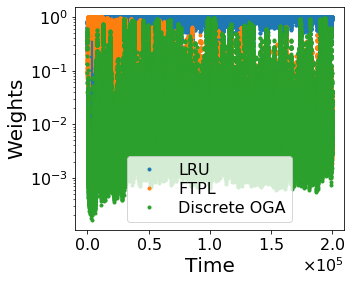

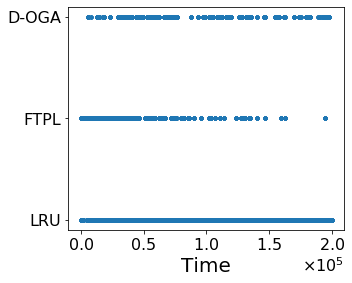

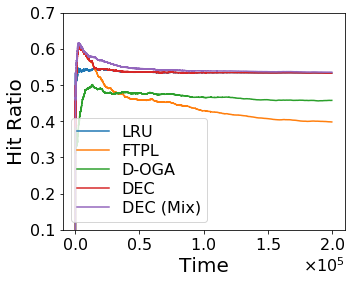

In [17]:
%matplotlib inline
set_fig_halfwidth()
cache_ranking_experts_mix.plot_expert_weights()
plt.savefig(f"./figures/ranking_rrm_mix_ep_weights.png", dpi=600)
plt.show()

cache_ranking_experts_mix.plot_expert_weights()
plt.yscale("log")
plt.savefig(f"./figures/ranking_rrm_mix_ep_weights_ylog.png", dpi=600)
plt.show()

plot_expert_choices(cache_ranking_experts_mix, ["LRU", "FTPL", "D-OGA"])
plt.savefig(f"./figures/ranking_rrm_mix_ep_choices.png", dpi=600)
plt.show()


dataset = "rrm"
plot_comp(\
          cache_LRU,\
#           cache_LFU,\
#           cache_BH,\
#           cache_OGA,\
          cache_FTPL,\
          cache_DiscreteOGA,\
#           cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,
         )
plt.ylim([0.1, 0.7])
plt.savefig(f"./figures/ranking_{dataset}_mix.pdf")
plt.show()




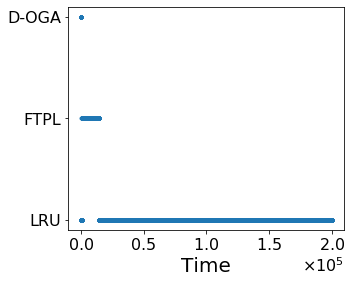

In [18]:
plt.clf()
plot_expert_choices(cache_ranking_experts, ["LRU", "FTPL", "D-OGA"])
plt.savefig(f"./figures/ranking_rrm_mix_ep_choices.png", dpi=600)
plt.show()

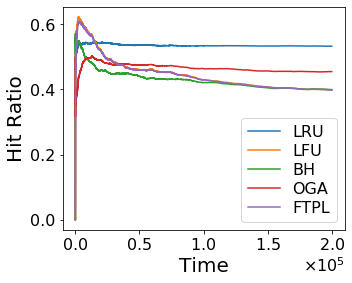

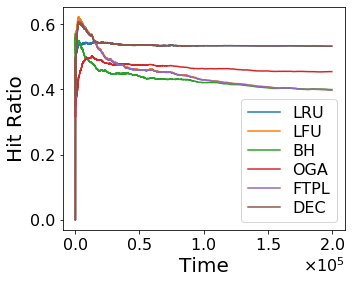

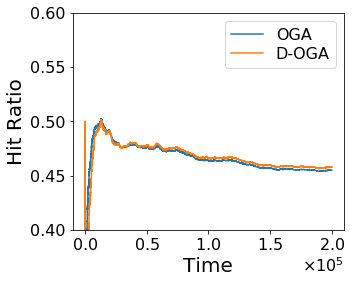

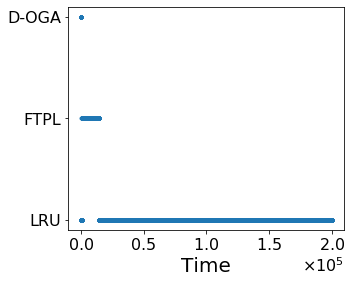

In [6]:
set_fig_halfwidth()
dataset = "rrm"
save = True
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
#           cache_ranking_experts,\
#           cache_ranking_experts_mix,\
         )
if save:
    plt.savefig(f"./figures/analysis_{dataset}.pdf")
plt.show()

plt.clf()
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
          cache_ranking_experts,\
#           cache_ranking_experts_mix,\
         )
if save:
    plt.savefig(f"./figures/ranking_{dataset}.pdf")
plt.show()
    
    
plt.clf()
plot_comp(\
          cache_OGA,\
          cache_DiscreteOGA,\
         )
plt.ylim([0.4, 0.6])

if save:
    plt.savefig(f"./figures/D-OGA_{dataset}.pdf")
plt.show()

plt.clf()
plot_expert_choices(cache_ranking_experts, ["LRU", "FTPL", "D-OGA"])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_ep_choices.png", dpi=600)
plt.show()

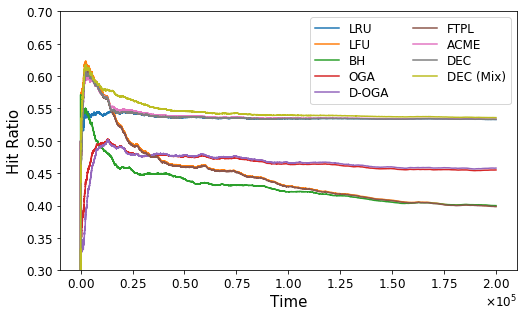

In [7]:
set_fig_fullwidth(scale=1.5)
dataset = "rrm"
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,\
          legend_columns=2)
plt.ylim([0.3, 0.7])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_all.pdf")
plt.show()

# YouTube

In [8]:
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = \
load_caches(cache_file_yt)
cache_ranking_experts_mix.name = "DEC (Mix)"
cache_ranking_experts.name = "DEC"
cache_BH.name = "BH"
cache_DiscreteOGA.name = "D-OGA"

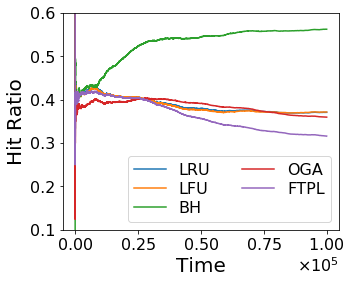

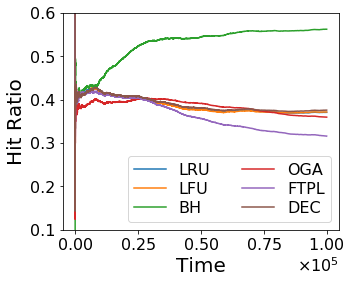

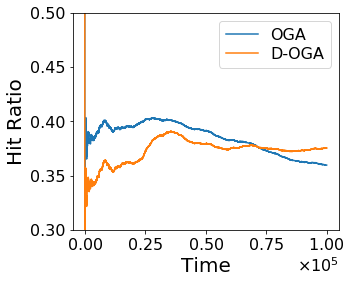

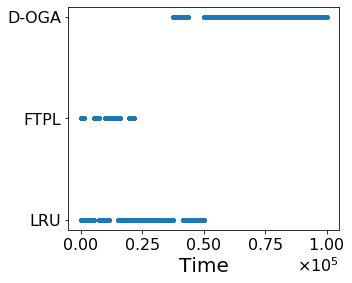

In [9]:
set_fig_halfwidth()
dataset = "yt"
save = True
plot_comp(\
          cache_LRU,
          cache_LFU,
          cache_BH,
          cache_OGA,
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
#           cache_ranking_experts,\
#           cache_ranking_experts_mix,\
          legend_columns=2, 
         )
plt.ylim([0.1, 0.6])
if save:
    plt.savefig(f"./figures/analysis_{dataset}.pdf")
plt.show()

plt.clf()
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
          cache_ranking_experts,\
#           cache_ranking_experts_mix,\
          legend_columns=2, 
         )
plt.ylim([0.1, 0.6])
if save:
    plt.savefig(f"./figures/ranking_{dataset}.pdf")
plt.show()
    
    
plt.clf()
plot_comp(\
          cache_OGA,\
          cache_DiscreteOGA,\
         )

plt.ylim([0.3, 0.5])
if save:
    plt.savefig(f"./figures/D-OGA_{dataset}.pdf")
plt.show()

plt.clf()
plot_expert_choices(cache_ranking_experts, ["LRU", "FTPL", "D-OGA"])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_ep_choices.png", dpi=600)
plt.show()

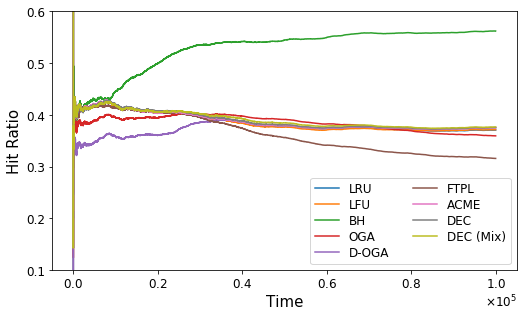

In [10]:
set_fig_fullwidth(scale=1.5)
dataset = "yt"
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,\
          legend_columns=2, \
         )
plt.ylim([0.1, 0.6])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_all.pdf")
plt.show()

# Movielens

In [11]:
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = \
load_caches(cache_file_movielens)
cache_ranking_experts_mix.name = "DEC (Mix)"
cache_ranking_experts.name = "DEC"
cache_BH.name = "BH"
cache_DiscreteOGA.name = "D-OGA"

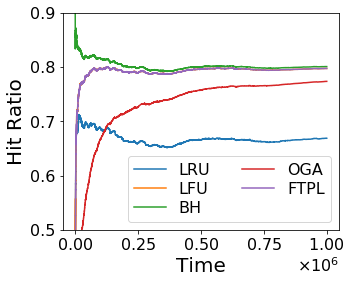

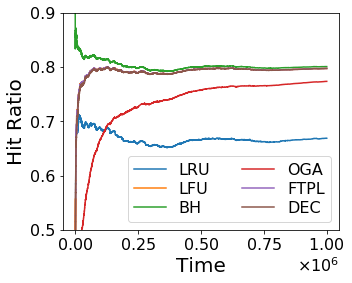

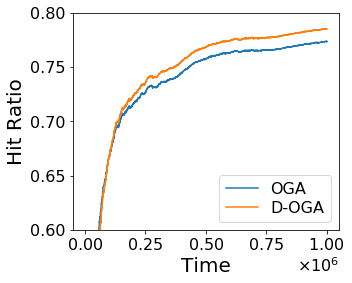

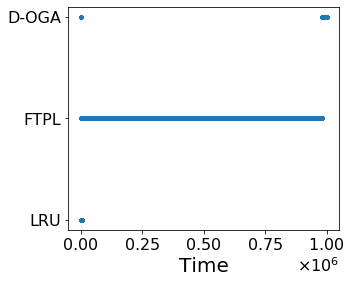

In [12]:
set_fig_halfwidth()
dataset = "movielens"
save = True
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
#           cache_ranking_experts,\
#           cache_ranking_experts_mix,\
          legend_columns=2
         )
plt.ylim([0.5, 0.9])
if save:
    plt.savefig(f"./figures/analysis_{dataset}.pdf")
plt.show()

plt.clf()
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
#           cache_DiscreteOGA,\
          cache_FTPL,\
#           cache_voting_experts,\
          cache_ranking_experts,\
#           cache_ranking_experts_mix,\
          legend_columns=2
         )
plt.ylim([0.5, 0.9])
if save:
    plt.savefig(f"./figures/ranking_{dataset}.pdf")
plt.show()
    
    
plt.clf()
plot_comp(\
          cache_OGA,\
          cache_DiscreteOGA,\
         )
plt.ylim([0.6, 0.8])
if save:
    plt.savefig(f"./figures/D-OGA_{dataset}.pdf")
plt.show()

plt.clf()
plot_expert_choices(cache_ranking_experts, ["LRU", "FTPL", "D-OGA"])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_ep_choices.png", dpi=600)
plt.show()

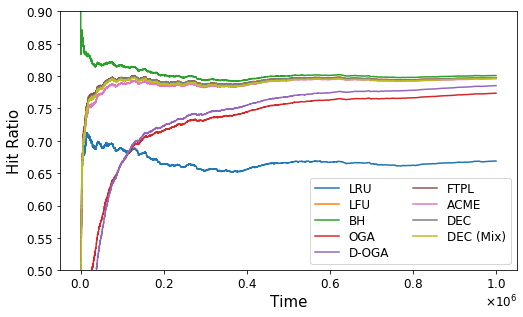

In [13]:
set_fig_fullwidth(scale=1.5)
dataset = "movielens"
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
          cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,\
          legend_columns=2)
plt.ylim([0.5, 0.9])
if save:
    plt.savefig(f"./figures/ranking_{dataset}_all.pdf")
plt.show()